In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# exp3
exp3_ws = pd.read_csv("exp3-withsign.csv", sep = ',')

In [3]:
exp3_ws.columns
exp3 = exp3_ws.copy()

In [4]:
len(exp3_ws)

50

In [5]:
df_exp3 = pd.DataFrame()
for col in exp3.columns:
    line = exp3[col]
    df_col = pd.DataFrame()
    for l in line:
        line = l
        line = line.replace("[", "")
        line = line.replace("]", "")
        if len(line) > 0 :
            lines = line.split(" ")
            if col in ['num-neighbors', 'sign'] :
                lines_arr = np.array(lines,dtype=int)
            else:
                lines_arr = np.array(lines,dtype=float)
            lines_df = pd.DataFrame(lines_arr)
            df_col = df_col.append(lines_df, ignore_index=True)
    df_exp3 = pd.concat((df_exp3, df_col), axis = 1)
    

In [6]:
df_exp3.columns = exp3.columns

In [7]:
len(df_exp3)

2500

In [8]:
df_exp3['label'] = 'others'
df_exp3.loc[df_exp3['net-worth'] >= 5000, 'label'] = 'winners'
# df_exp3.loc[df_exp3['net-worth'] < 1000, 'label'] = 'losers'

In [25]:
np.average(df_exp3['news-sens'])

0.5983625162597915

In [26]:
np.average(df_exp3[df_exp3['label'] == 'winners']['news-sens'])

0.25514520044242917

In [27]:
np.average(df_exp3[df_exp3['label'] != 'winners']['news-sens'])

0.6152137231211559

In [9]:
df_others = df_exp3
df_others = df_others[df_others['label']!= 'winners']

In [10]:
df_winner = df_exp3
df_winner = df_winner[df_winner['label']== 'winners']

In [11]:
df_others['contrarian'] = 'normal'
df_others.loc[(df_others['peer-sens'] + df_others['news-sens'] < 0 ), 'contrarian'] = 'contrarian'
# df_winner.loc[(df_winner['self-sens'] <= 0.66) & (df_winner['self-sens '] == 'n') , 'self-sens '] = '0.33-0.66'
# df_winner.loc[(df_winner['self-sens'] <= 0.6) & (df_winner['self-sens '] == 'n') , 'self-sens '] = '0.4-0.6'
# df_winner.loc[(df_winner['self-sens'] <= 0.8) & (df_winner['self-sens '] =='n' ), 'self-sens '] = '0.6-0.8'
# df_winner.loc[(df_winner['self-sens'] > 0.66), 'self-sens '] = '0.66-1.00'
# df1 = df[(df.a != -1) & (df.b != -1)]

<ipython-input-11-f5612f890072>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_others['contrarian'] = 'normal'
/Users/heekim/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [12]:
o = len(df_others[df_others['contrarian'] == 'contrarian'])

In [13]:
print(o/len(df_others))

# 10 % 55 % - 0.2
# 12 % 63% - 0.1
# 15 % 69% - 0

0.1527486361728913


In [14]:
df_winner['contrarian'] = 'normal'
df_winner.loc[(df_winner['peer-sens'] + df_winner['news-sens'] < 0 ), 'contrarian'] = 'contrarian'

<ipython-input-14-4417cbba4c67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_winner['contrarian'] = 'normal'


In [15]:
w = len(df_winner[df_winner['contrarian'] == 'contrarian'])

In [16]:
print(w/117)

0.6923076923076923


In [17]:
df_winner['self-sens '] = 'n'
df_winner.loc[(df_winner['self-sens'] <= 0.33) & (df_winner['self-sens '] == 'n' ), 'self-sens '] = '0.00-0.33'
df_winner.loc[(df_winner['self-sens'] <= 0.66) & (df_winner['self-sens '] == 'n') , 'self-sens '] = '0.33-0.66'
# df_winner.loc[(df_winner['self-sens'] <= 0.6) & (df_winner['self-sens '] == 'n') , 'self-sens '] = '0.4-0.6'
# df_winner.loc[(df_winner['self-sens'] <= 0.8) & (df_winner['self-sens '] =='n' ), 'self-sens '] = '0.6-0.8'
df_winner.loc[(df_winner['self-sens'] > 0.66), 'self-sens '] = '0.66-1.00'
# df1 = df[(df.a != -1) & (df.b != -1)]


<ipython-input-17-71191ad3131c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_winner['self-sens '] = 'n'


In [18]:
df_winner = df_winner.sort_values(by = 'self-sens ')

In [19]:
mycmap = ['red', 'darkgray', 'blue']

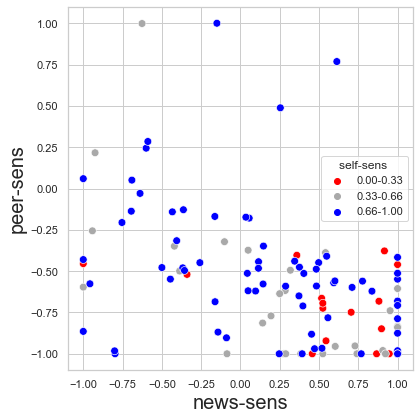

In [20]:
sns.set(rc={'figure.figsize':(6, 6)})
sns.set_style("whitegrid")
sns.scatterplot(data = df_winner, x = 'news-sens', y = 'peer-sens', hue = 'self-sens ',palette= mycmap , s=60, alpha = 1.0)
plt.xlabel('news-sens', size = 20)
plt.ylabel('peer-sens', size = 20)
plt.tight_layout()

plt.savefig("3.png", dpi=120)

In [21]:
other= len(df_others)
winner = len(df_winner)
print(other, o, other-o, "\n", winner, w, winner-w)

2383 364 2019 
 117 81 36


In [22]:
81/117

0.6923076923076923

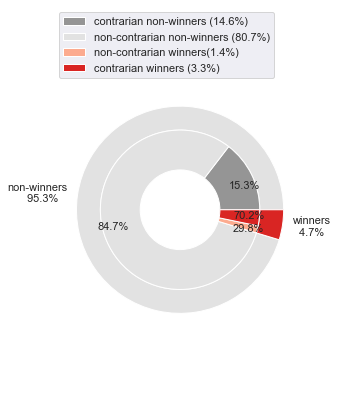

In [23]:
group_names=['non-winners\n95.3%   ', 'winners\n  4.7%']
group_size=[2383,117]
subgroup_names=['15.3%','84.7%','\n29.8%','70.2%']
subgroup_size=[364, 2019, 36, 81] 
sns.set(rc={'figure.figsize':(5, 6)})
# Create colors
a, b =[plt.cm.Greys, plt.cm.Reds]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.2), b(0.7)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 

mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3,\
                   labels =subgroup_names, labeldistance=0.68, colors=[a(0.5), a(0.2), b(0.3), b(0.7)])
plt.legend(mypie2, ['contrarian non-winners (14.6%)', 'non-contrarian non-winners (80.7%)', 'non-contrarian winners(1.4%)', 'contrarian winners (3.3%)'], \
           loc="upper right")
plt.setp( mypie2, width=0.5, edgecolor='white')
plt.tight_layout()
plt.margins(0,0)

plt.savefig("pie-winning.png", dpi=120)
 
plt.show()


In [265]:
df_exp3.loc[df_winner['label'] == 'winners']

,mean-net-worth-neighbors,num-neighbors,news-sens,peer-sens,self-sens,net-worth,sign,label
29,1173.65,3,0.524023,-1.000000,0.536345,7466.9,1,winners
55,1664.90,3,-0.433237,-0.141249,0.894663,5807.0,1,winners
69,1496.70,3,-0.085437,-1.000000,0.629449,8449.4,1,winners
81,1389.20,1,0.372518,-0.649734,0.968260,6330.5,1,winners
86,1160.75,3,0.392808,-1.000000,0.858319,7118.9,-1,winners
...,...,...,...,...,...,...,...,...
2295,2081.60,1,1.000000,-0.875525,0.905856,5949.8,1,winners
2316,1637.45,4,0.403484,-0.513906,0.743337,5171.0,1,winners
2378,1776.95,4,-1.000000,-0.596543,0.593691,5407.4,-1,winners
2404,1309.40,1,0.710557,-0.598237,0.815446,6074.6,1,winners


In [263]:
df_winner = df_exp3

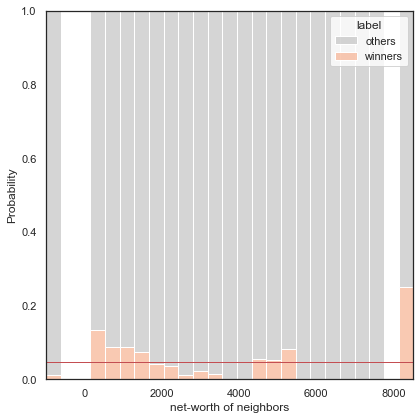

In [207]:
sns.set_style(style="white") 
sns.histplot(data = df_exp3, x ='mean-net-worth-neighbors', bins = 25, hue= 'label',palette="RdGy_r",  stat="probability", multiple="fill")
# plt.legend(loc='center')
sns.set(rc={'figure.figsize':(6, 6)})
plt.axhline(0.0468, linewidth=1, color='r')
plt.tight_layout()
# plt.ylabel("count")/
plt.xlabel("net-worth of neighbors")
# plt.title("mean-net-worth distribution of winners' and losers' neighbors")
plt.savefig("new-exp3-winner mean-net-worth distribution.png", dpi=120)


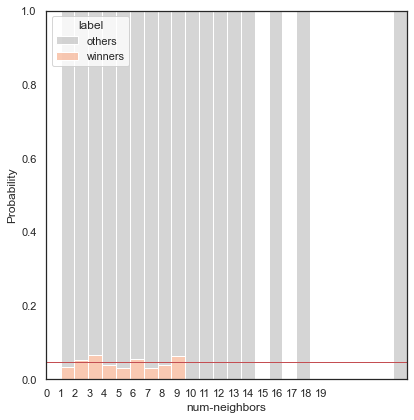

In [182]:

sns.set_style(style="white") 
sns.histplot(data = df_exp3, x ='num-neighbors', bins = 25,hue= 'label',palette="RdGy_r",  stat="probability", multiple="fill")
# plt.legend(loc='upper right')
sns.set(rc={'figure.figsize':(6, 6)})
plt.axhline(0.0468, linewidth=1, color='r')
plt.tight_layout()
plt.xticks(range(0, 20))
# plt.ylabel("count")
plt.xlabel("num-neighbors")
# plt.title("mean-net-worth distribution of winners' and losers' neighbors")
plt.savefig("new-exp3-winner num-neighbors distribution.png", dpi=120)


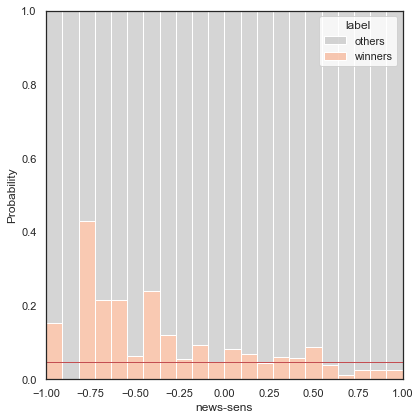

In [183]:

sns.set_style(style="white") 
sns.histplot(data = df_exp3, x ='news-sens', hue= 'label',palette="RdGy_r" , stat="probability", multiple="fill")
# plt.legend(loc='upper right')
sns.set(rc={'figure.figsize':(6, 6)})
plt.axhline(0.0468, linewidth=1, color='r')
plt.tight_layout()
# plt.ylabel("count")
plt.xlabel("news-sens")
# plt.title("mean-net-worth distribution of winners' and losers' neighbors")
plt.savefig("new-exp3-winner news-sens distribution.png", dpi=120)


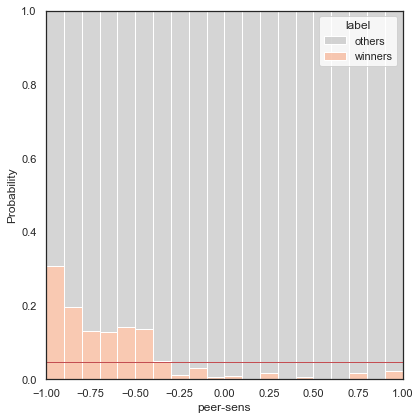

In [230]:

sns.set_style(style="white") 
sns.histplot(data = df_exp3, x ='peer-sens', hue= 'label',palette="RdGy_r",  stat="probability", multiple="fill")
# plt.legend(loc='upper right')
sns.set(rc={'figure.figsize':(6, 6)})
plt.axhline(0.0468, linewidth=1, color='r')
plt.tight_layout()
# plt.ylabel("count")
plt.xlabel("peer-sens")
# plt.title("mean-net-worth distribution of winners' and losers' neighbors")
plt.savefig("new-exp3-winner peer-sens.png", dpi=120)


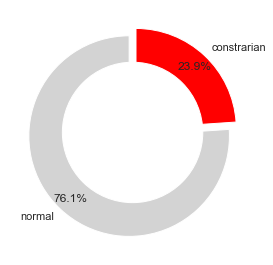

In [252]:
# Pie chart
fig, ax = plt.subplots()
fig.set_size_inches(4, 4)

labels = ['normal', 'constrarian']
sizes = [117-28, 28]
colors = ['lightgray', 'red']
explode = (0.05,0.05 )
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.savefig("exp3-winners.png", dpi=120)
plt.show()

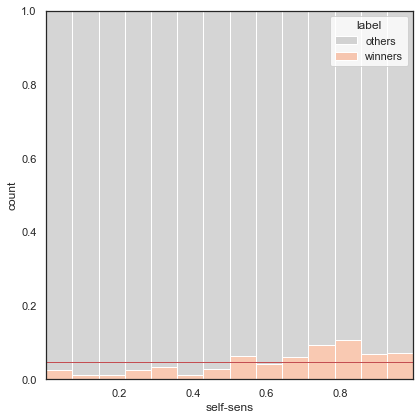

In [184]:

sns.set_style(style="white") 
sns.histplot(data = df_exp3, x ='self-sens', hue= 'label',palette="RdGy_r" , stat="probability", multiple="fill")
# plt.legend(loc='upper right')
sns.set(rc={'figure.figsize':(6, 6)})
plt.axhline(0.0468, linewidth=1, color='r')

plt.tight_layout()
plt.ylabel("count")
plt.xlabel("self-sens")
# plt.title("mean-net-worth distribution of winners' and losers' neighbors")
plt.savefig("new-exp3-self-sens num-neighbors distribution.png", dpi=120)


In [118]:
df_exp3.columns

Index(['mean-net-worth-neighbors', 'num-neighbors', 'news-sens', 'peer-sens',
       'self-sens', 'net-worth', 'sign', 'label'],
      dtype='object')

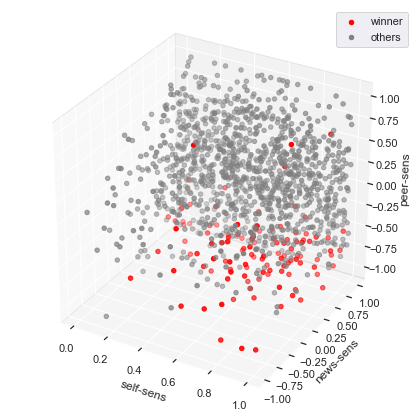

In [414]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('w')
ax.xaxis.pane.set_edgecolor('lightgray')
ax.yaxis.pane.set_edgecolor('lightgray')
ax.zaxis.pane.set_edgecolor('lightgray')

ax.scatter(df_exp3[df_exp3['label']=='winners']['self-sens'],  df_exp3[df_exp3['label']=='winners']['news-sens'], \
           df_exp3[df_exp3['label']=='winners']['peer-sens'], c='red', marker='o', label = 'winner')
ax.scatter(df_exp3[df_exp3['label']!='winners']['self-sens'].sample(frac=0.5), df_exp3[df_exp3['label']!='winners']['news-sens'].sample(frac=0.5), \
           df_exp3[df_exp3['label']!='winners']['peer-sens'].sample(frac=0.5), c='gray', marker='o', label = 'others')

ax.set_xlabel('self-sens')
ax.set_ylabel('news-sens')
ax.set_zlabel('peer-sens')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("new-exp3-3d plot.png", dpi=120)
plt.show()


In [221]:
corr = df_exp3.corr()
corr.style.background_gradient(cmap='coolwarm')

,mean-net-worth-neighbors,num-neighbors,news-sens,peer-sens,self-sens,net-worth,sign
mean-net-worth-neighbors,1.000000,0.257268,0.045347,0.051800,0.033900,0.002011,0.043405
num-neighbors,0.257268,1.000000,-0.009834,-0.019915,-0.005184,-0.000958,-0.008314
news-sens,0.045347,-0.009834,1.000000,0.040869,-0.003918,-0.211973,0.623820
peer-sens,0.051800,-0.019915,0.040869,1.000000,0.017714,-0.417030,0.025420
self-sens,0.033900,-0.005184,-0.003918,0.017714,1.000000,-0.026746,-0.004100
net-worth,0.002011,-0.000958,-0.211973,-0.417030,-0.026746,1.000000,-0.212244
sign,0.043405,-0.008314,0.623820,0.025420,-0.004100,-0.212244,1.000000


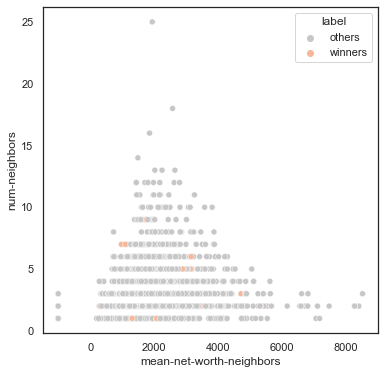

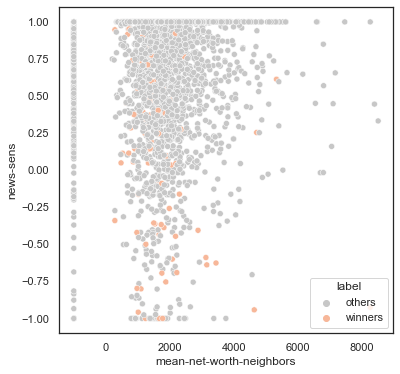

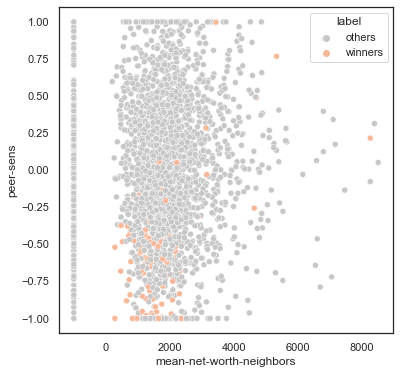

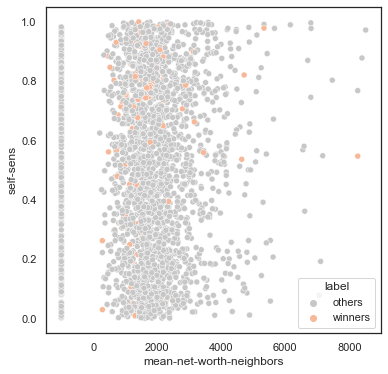

skip  net-worth


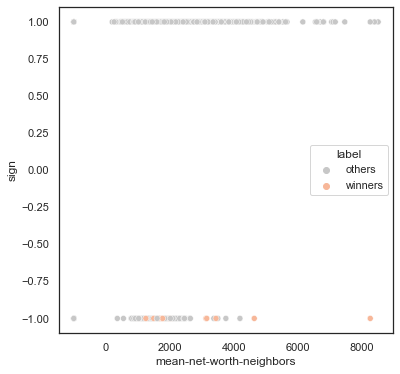

skip  label


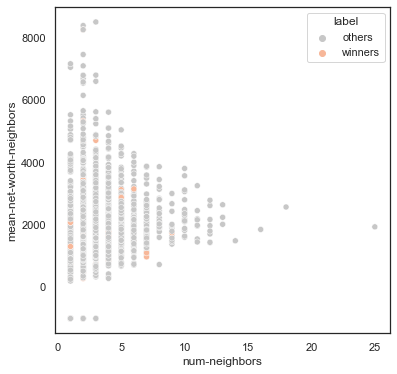

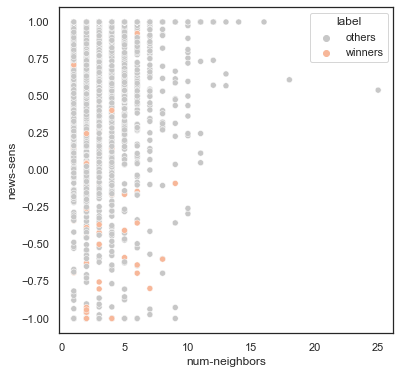

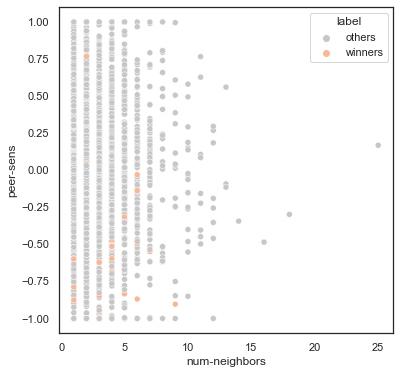

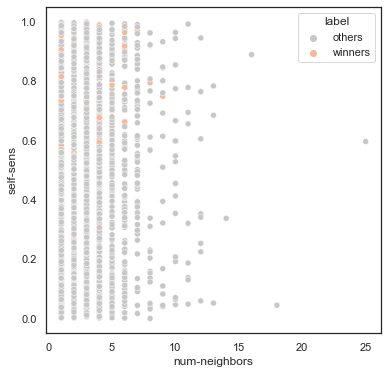

skip  net-worth


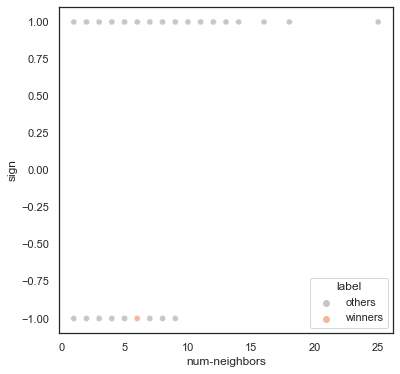

skip  label


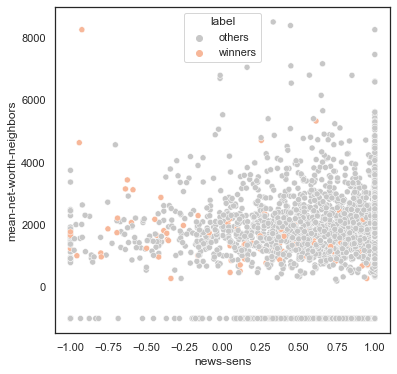

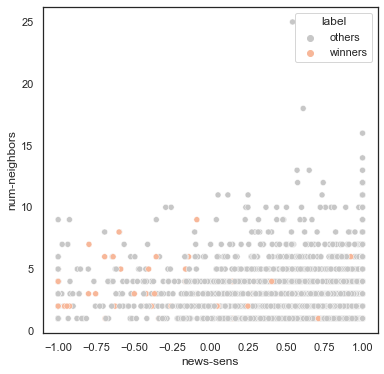

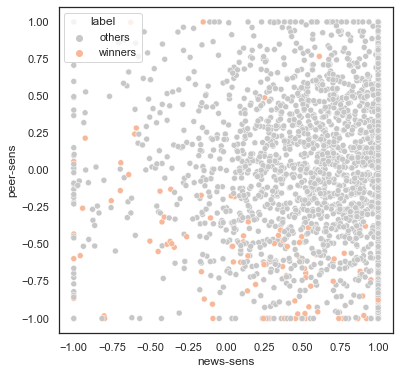

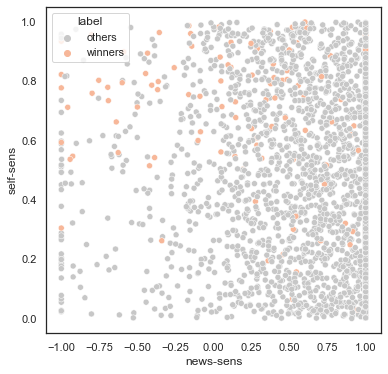

skip  net-worth


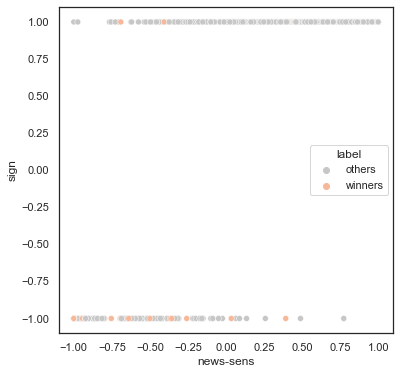

skip  label


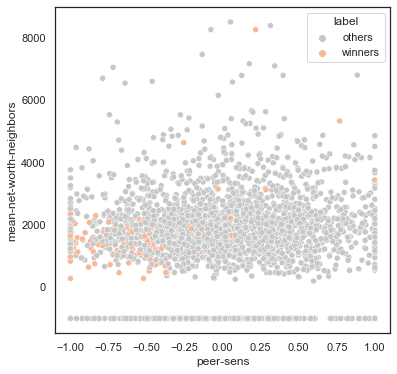

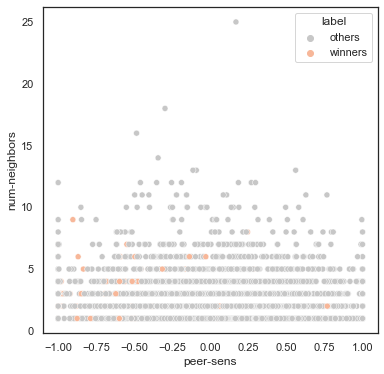

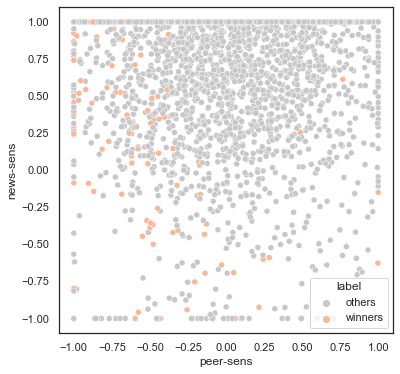

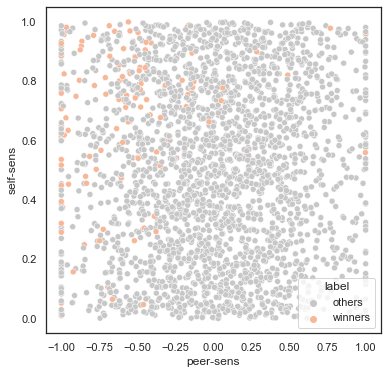

skip  net-worth


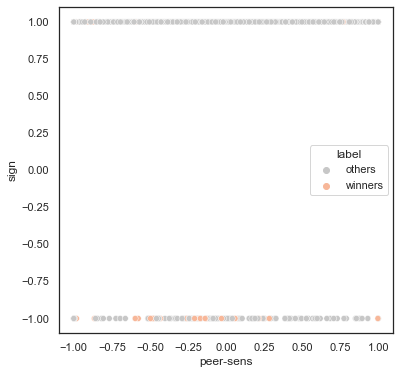

skip  label


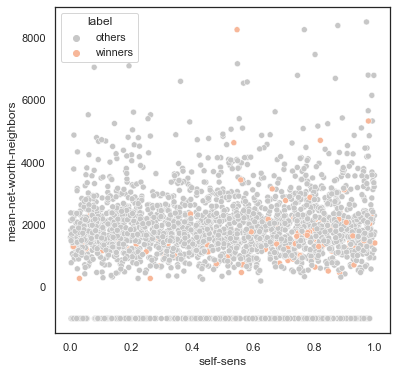

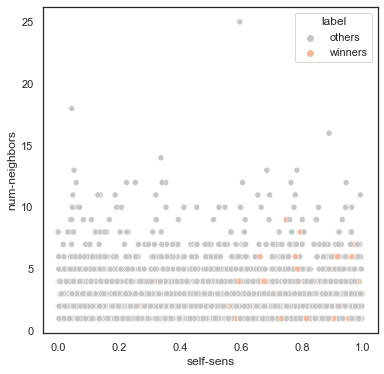

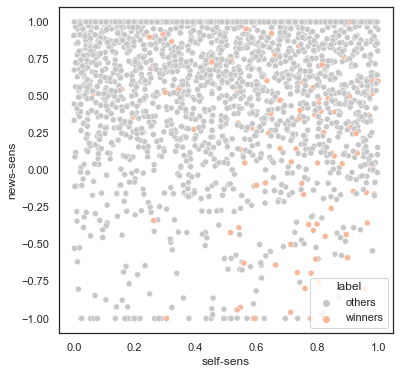

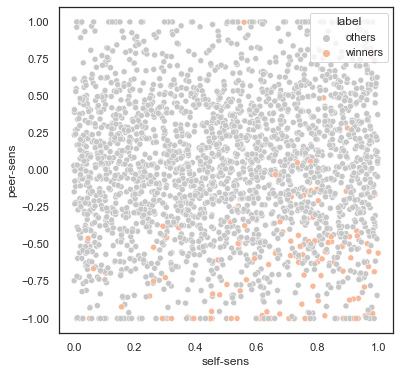

skip  net-worth


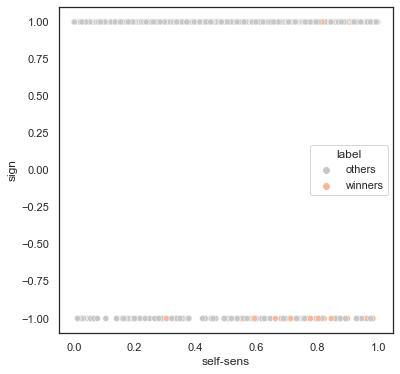

skip  label
skip  net-worth


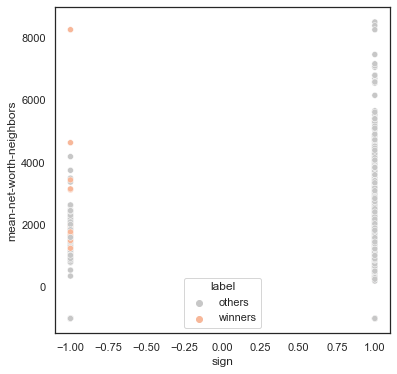

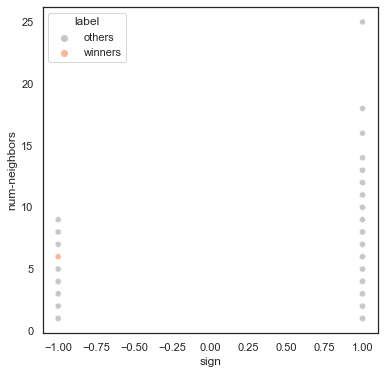

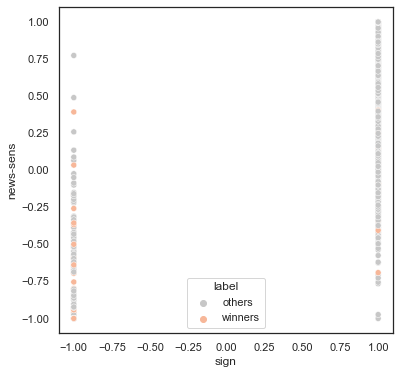

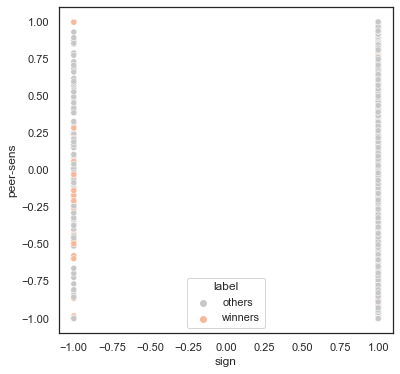

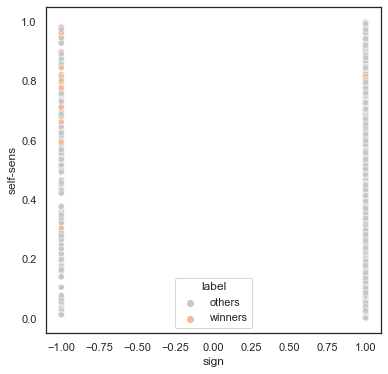

skip  net-worth
skip  label
skip  label


In [149]:
skip_list = ['label', 'net-worth']

for c1 in df_exp3.columns:
    if (c1 in skip_list):
        print("skip ", c1)
        continue
    for c2 in df_exp3.columns:
        if (c2 in skip_list):
            print("skip ", c2)
            continue
        if c1 != c2:
            sns.set_style(style="white") 
            sns.scatterplot(data=df_exp3, x=c1, y=c2, hue="label", palette="RdGy_r" )
            plt.show()